 # GOLUB use case

In [1]:
library("evaluomeR")
library("ISLR")
library("clusterAnalysis")

#library("dplyr")
#library("caret")
library("MLmetrics")
library("ggplot2")
library("ggrepel")
#library("reshape2")

options(scipen=10)
options(repr.plot.width=12, repr.plot.height=12)

Cargando paquete requerido: SummarizedExperiment

Cargando paquete requerido: MatrixGenerics

Cargando paquete requerido: matrixStats


Adjuntando el paquete: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles,

In [2]:
getRversion()
packageVersion("clusterAnalysis")

[1] '4.4.1'

[1] '0.0.0.9000'

# Table of contents
* [Dataset](#dataset)
    * [Top 200](#top)
* [Cest](#clest)
    * [RSKC](#rskc)
* [PCA](#pca)
* [Sensitivity](#sensitivity)
* [CER](#cer)

# Dataset <a class="anchor" id="dataset"></a>

In [3]:
data("nci60_k8")
dataset = nci60_k8
head(dataset)
set.seed(13626)

,Description,4701,4700,256,16,4699,6393,6149,286,6415,⋯,5721,6622,5336,1067,6288,5872,5489,78,127,3383
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
V1,CNS,5.770000,5.820000,-1.910000,-2.37,4.760000,5.4799900,0.000000,0.610000,5.230000,⋯,2.790000,1.210000,-0.890000,-1.055010,-2.1850100,0.045000,1.990000,2.360000,-1.305000,-0.5400195
V2,CNS,5.039961,5.069961,-1.980039,0.00,4.779961,5.7299510,-0.480039,-3.980039,5.329961,⋯,1.629961,1.599961,-1.060039,-1.055049,-3.4050490,0.874961,2.609961,0.869961,-0.375039,0.4799415
V3,CNS,-1.440000,-1.030000,-0.580000,0.00,0.000000,4.6299900,2.060000,-1.580000,0.000000,⋯,1.920000,-0.260000,0.000000,1.294990,-0.6850098,1.445000,0.200000,1.990000,0.705000,0.3199805
V4,RENAL,-2.420000,-2.420000,-1.880000,-1.02,-2.590000,1.2999900,5.190000,-4.880000,7.020000,⋯,3.200000,1.110000,1.060000,1.414990,-4.4750100,2.365000,1.080000,3.600000,-0.685000,0.1399805
V5,BREAST,-2.955000,-2.955000,-1.235000,0.00,-2.535000,-1.0550098,7.425000,-3.235000,4.395000,⋯,2.865000,1.245000,0.000000,-1.480010,-3.8300098,3.320000,-1.155000,-1.385000,-1.220000,0.4449805
V6,CNS,0.000000,-3.180000,-3.050000,-0.05,-1.170000,0.5899902,4.230000,-5.050000,-0.220000,⋯,2.860000,1.360000,0.000000,-1.425010,-2.2550100,1.615000,-0.970000,1.370000,-2.445000,-1.5400200


# Clest <a class="anchor" id="clest"></a>
Execution of Clest over the previous dataset.

In [4]:
dataset_matrix = as.matrix(dataset[, -1])
clest_result = clusterAnalysis::clest(dataset_matrix, maxK=10, pmax=0.05, dmin=0.05, B=20,B0=20,
                                  clusterAlg=myPam, rho=2/3, similarity=dendextend::FM_index_R, verbose=FALSE)
message(paste0("Clest optimal k: ", clest_result$kopt))

Clest optimal k: 4



In [5]:
pa = cluster::pam(dataset_matrix, clest_result$kopt)
predicted = pa$clustering

In [6]:
dataset["Cluster"] = as.factor(as.numeric(predicted))
pca_matrix = dataset %>% select(-Cluster)
r_pca = evaluomeR::performPCA(dataset = pca_matrix)
pca_df = r_pca$dataset_ncp
pca_df$Cluster <- as.factor(dataset$Cluster)
pca_df$Description <- dataset$Description

Parameter 'npc' is null. Computing number of factors automatically:

Number of factors, 'ncp' used is: 35



Warning message:
"The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"ggrepel: 24 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


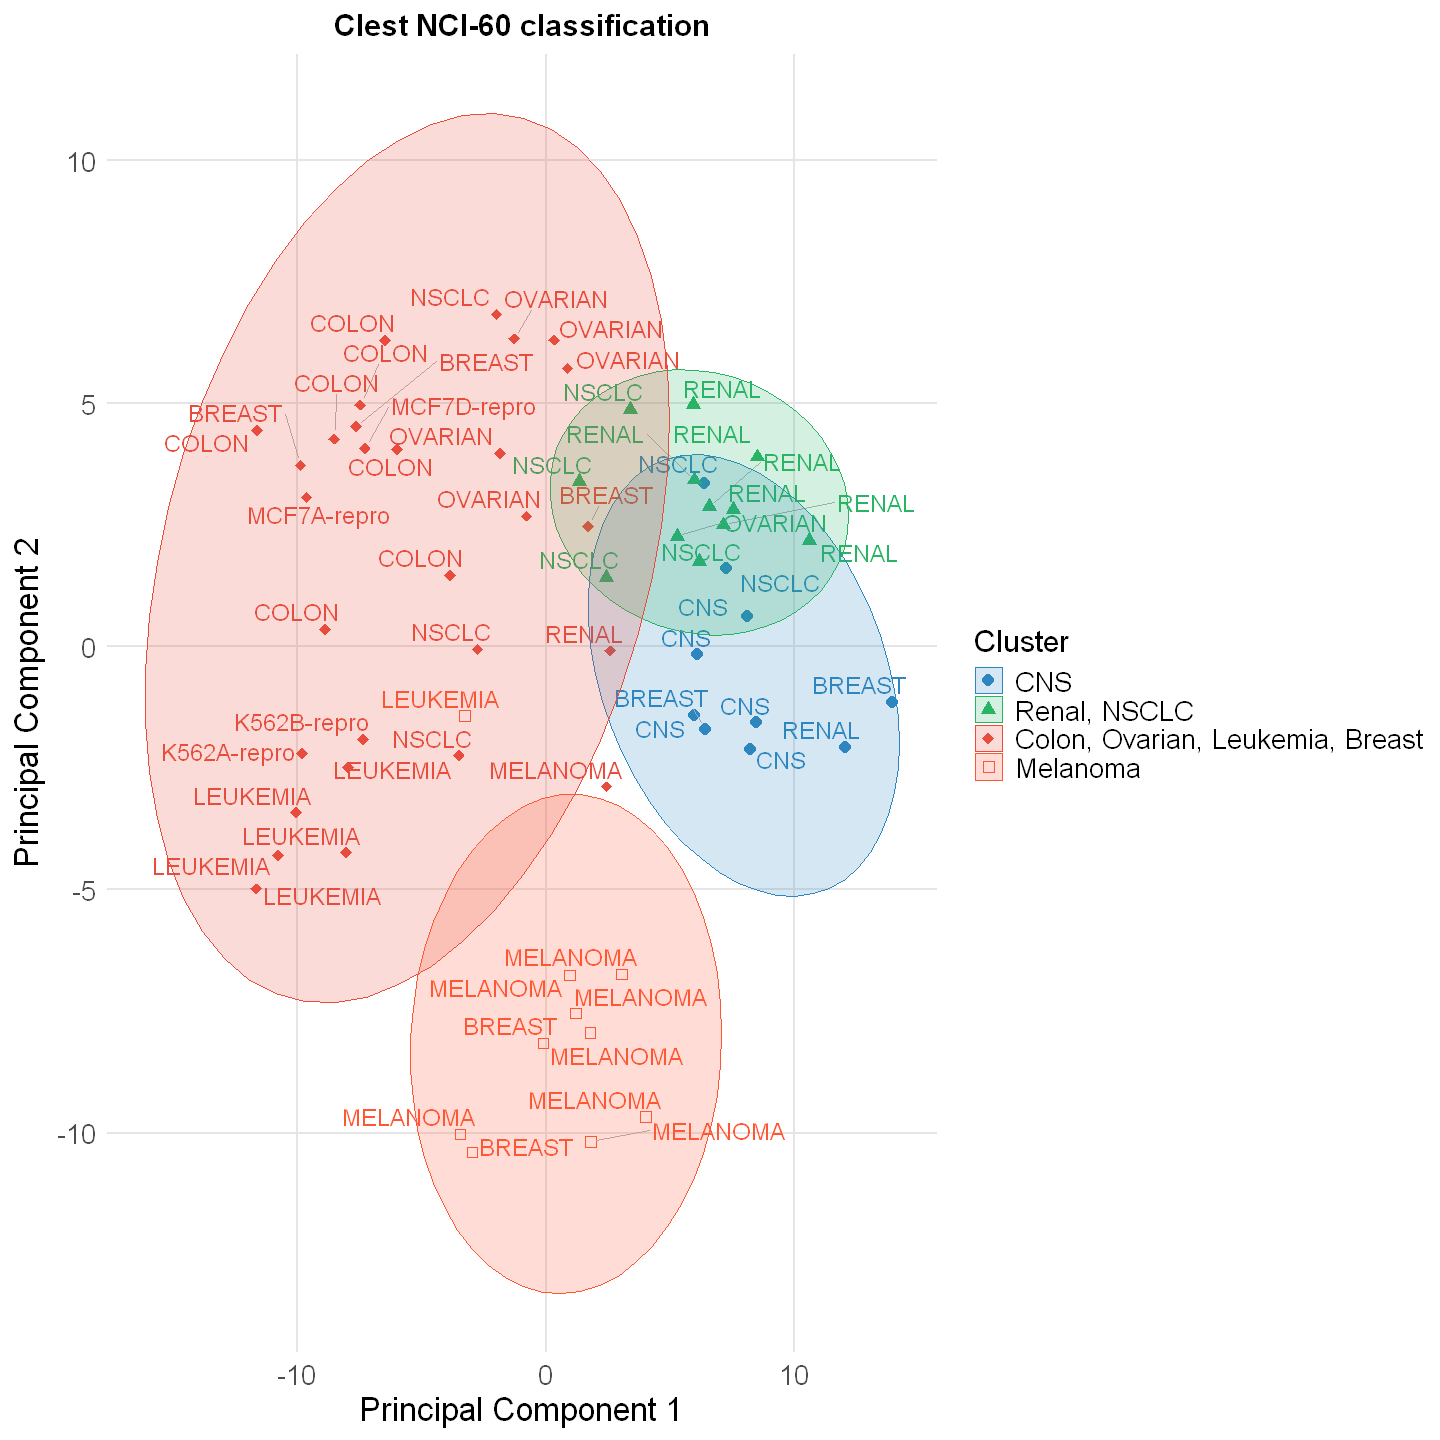

In [19]:
cluster_colors = c("#2E86C1", "#28B463", "#E74C3C", "#FF5733")

cluster_shapes =  c(16, 17, 18, 22)
cluster_labels = c("CNS", "Renal, NSCLC", "Colon, Ovarian, Leukemia, Breast", "Melanoma")

ggplot(pca_df, aes(x = Dim.1, y = Dim.2, shape = Cluster, color = Cluster, label = Description)) +
  geom_point(size = 3) +
  geom_text_repel(
    vjust = 1,
    hjust = 1,
    size = 5,
    show.legend = FALSE,
    point.padding = 0.4,
    box.padding = 0.25,
    max.overlaps = 10,
    segment.color = "grey70",
    segment.size = 0.2
  ) +
  stat_ellipse(aes(fill = Cluster, group = Cluster), level = 0.95, alpha = 0.2, geom = "polygon") +
  labs(
    title = "Clest NCI-60 classification",
    x = "Principal Component 1",
    y = "Principal Component 2"
  ) +
  scale_shape_manual(values = cluster_shapes, labels = cluster_labels) +
  scale_color_manual(values = cluster_colors, labels = cluster_labels)  +
  scale_fill_manual(values = cluster_colors, labels = cluster_labels)   +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.title.x = element_text(size = 20),
    axis.title.y = element_text(size = 20),
    axis.text = element_text(size = 16),
    legend.position = "right",
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 16),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_blank()
  )

In [8]:
level_mapping <- c("NSCLC" = 2, "CNS" = 1, "BREAST" = 3,
                 "MCF7A-repro" = 3, "MCF7D-repro" = 3, "RENAL" = 2, 
                 "LEUKEMIA" = 3, "K562B-repro" = 3, "K562A-repro" = 3, 
                 "MELANOMA" = 4,  "COLON" = 3, "OVARIAN" = 3
                  )
map_strings_to_numbers <- function(strings) {
    return(as.numeric(level_mapping[strings]))
}
gold_standard_vector = as.vector(unlist(lapply(dataset["Description"], map_strings_to_numbers)))
gold_standard_vector

[1] 1 1 1 2 3 1 1 3 2 2 2 2 2 2 2 2 2 3 2 2 3 4 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3
[39] 3 3 3 3 3 3 3 3 3 3 3 2 2 2 4 3 3 4 4 4 4 4 4

In [9]:
# NCI-60
pa = cluster::pam(dataset_matrix, 4)
predicted = pa$clustering

In [10]:
sens = MLmetrics::Sensitivity(y_pred = predicted, y_true = gold_standard_vector)
sens = format(round(sens*100, 2), nsmall = 2)
print(paste0("Sensitivity: ", sens, "%"))

[1] "Sensitivity: 100.00%"


In [11]:
cer = CER(predicted, gold_standard_vector)
cer = format(round(cer*100, 2), nsmall = 2)
print(paste0("CER: ", cer, "%"))

[1] "CER: 23.93%"


In [12]:
clest_result

$p
[1] 0.45 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00

$d
[1] -0.01272206  0.10918235  0.15667714  0.15350175  0.12692709  0.12789677
[7]  0.15432907  0.14811375  0.07809752

$kopt
[1] 4

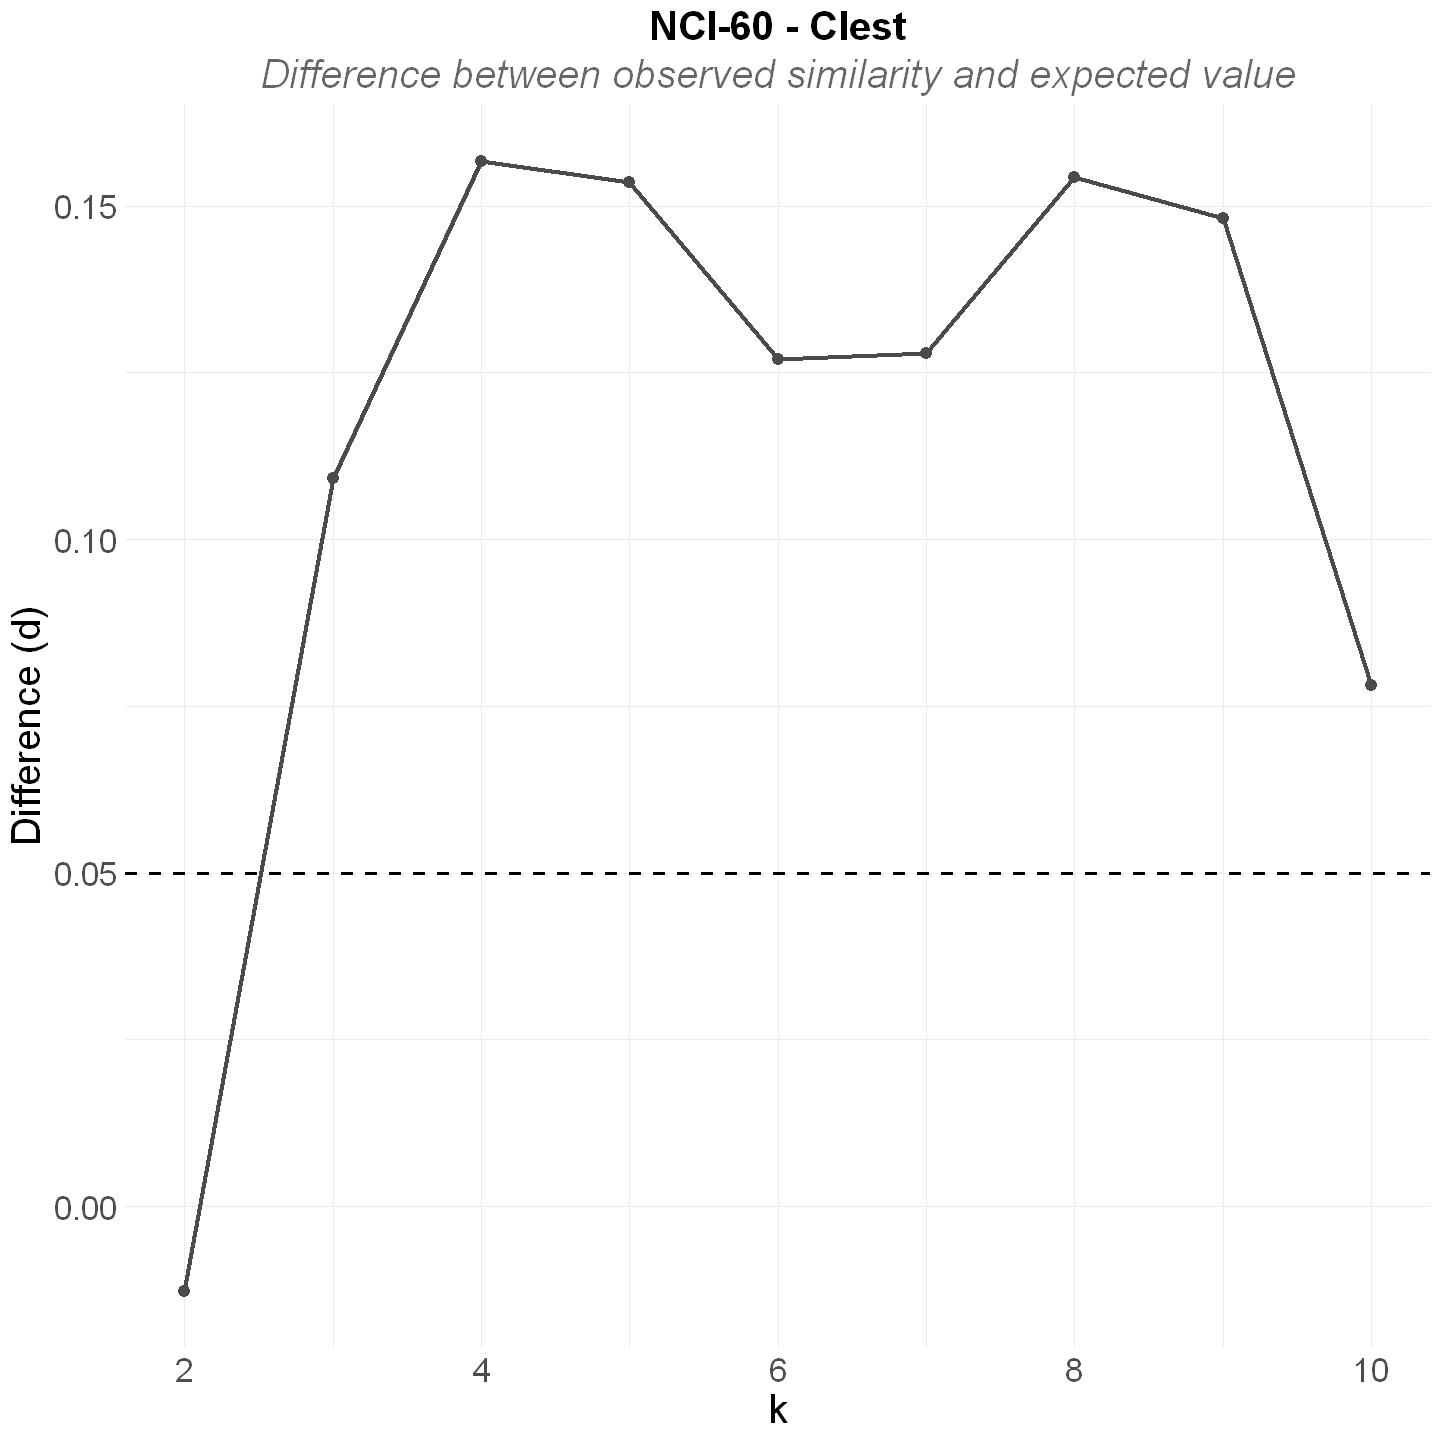

In [20]:
df <- data.frame(K = c(2:10), 
                 Difference = clest_result$d)

ggplot(df, aes(x = K, y = Difference)) +
  geom_line(color = "#4B4B4B", size = 1.2) +
  geom_point(size = 3, color = "#4B4B4B") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "black", size = 1) +
  scale_y_continuous(breaks = seq(0, max(df$Difference) + 0.05, by = 0.05)) +
  labs(title = "NCI-60 - Clest",
       subtitle = "Difference between observed similarity and expected value",
       x = "k", 
       y = "Difference (d)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 24, face = "italic", color = "gray40"),
    legend.position = "right",
    legend.title = element_text(size = 24),
    legend.text = element_text(size = 20),
    axis.title.x = element_text(size = 24),
    axis.title.y = element_text(size = 24),
    axis.text = element_text(size = 20)
  )

In [14]:
#ModelExplorer(, 10, similarity=dendextend::FM_index_R, clusterAlg = myPam, rho = 2/3, B = 100, verbose = FALSE)
#Gap(dataset_matrix, maxK=10, clusterAlg = myPam, B = 20, null_distrib = "uniform", verbose = TRUE)
mean(silhouette(pa$clustering, dist(dataset_matrix))[,3])

[1] 0.1254309